CHUẨN BỊ DỮ LIỆU

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'D:/HK1 2024 2025/Deep Learning/BTL/Final/dataset/train'
test_path = 'D:/HK1 2024 2025/Deep Learning/BTL/Final/dataset/test'
validation_path = 'D:/HK1 2024 2025/Deep Learning/BTL/Final/dataset/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 2509 images belonging to 3 classes.
Found 280 images belonging to 3 classes.
Found 253 images belonging to 3 classes.


Mô hình mạng neuron đơn giản

In [2]:
from tensorflow.keras import models, layers, optimizers

def build_simple_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 3 lớp đầu ra
    
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_2 = build_simple_cnn()
model_2.summary()

c:\Users\tranb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       802,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,195 (3.42 MB)

 Trainable params: 896,195 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
history_2= model_2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)
score = model_2.evaluate(test_generator)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10


c:\Users\tranb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.6156 - loss: 0.7889 - val_accuracy: 0.9750 - val_loss: 0.0861
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - accuracy: 0.9998 - loss: 0.0045 - val_accuracy: 0.9929 - val_loss: 0.0187
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9964 - val_loss: 0.0091
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - accuracy: 1.0000 - loss: 3.5858e-04 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 221ms/step - accuracy: 1.0000 - loss: 1.1806e-05 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 1.0000 - loss: 5.4470e-06 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 217ms/step - accuracy: 1.0000 - loss: 3.7592e-06 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 1.0000 - loss: 1.7753e-06 -

Epochs: 10
Training Accuracy: 10
Validation Accuracy: 10


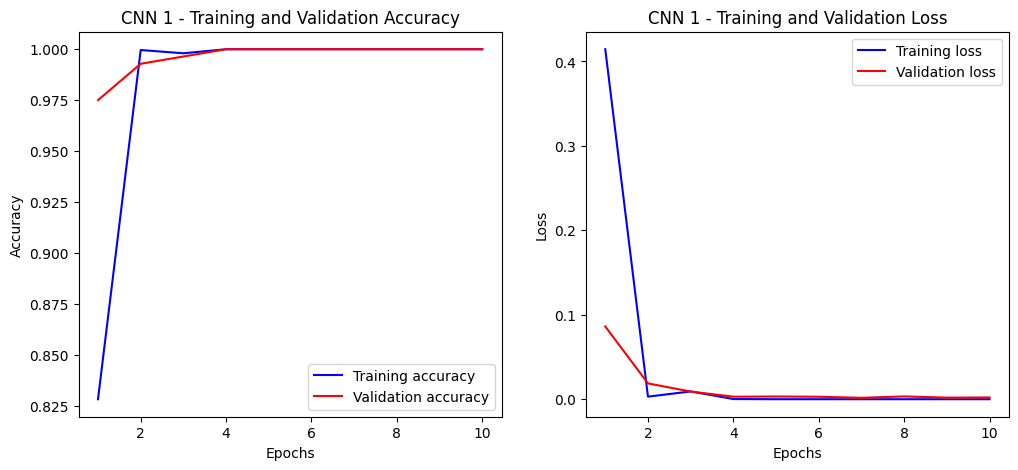

In [4]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    # Kiểm tra kích thước của các biến
    print(f'Epochs: {len(history_2.history["accuracy"])}')
    print(f'Training Accuracy: {len(history_2.history["accuracy"])}')
    print(f'Validation Accuracy: {len(history_2.history["val_accuracy"])}')
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Vẽ đồ thị Loss nếu có
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()


# Vẽ đồ thị cho model_1
plot_history(history_2, 'CNN 1')

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_confusion_matrix_heatmap(test_generator, model, class_labels):
    # Get true labels and predicted labels
    true_labels = []
    predicted_labels = []

    # Loop through the entire test set
    for i in range(len(test_generator)):
        # Get a batch of images and labels
        images, labels = test_generator[i]

        # Predict using the model
        predictions = model.predict(images)

        # For multi-class classification, use np.argmax to get the predicted class
        predicted_class = np.argmax(predictions, axis=-1)
        true_class = np.argmax(labels, axis=-1)

        # Append the true and predicted labels
        true_labels.extend(true_class)
        predicted_labels.extend(predicted_class)
    
    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

    return cm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


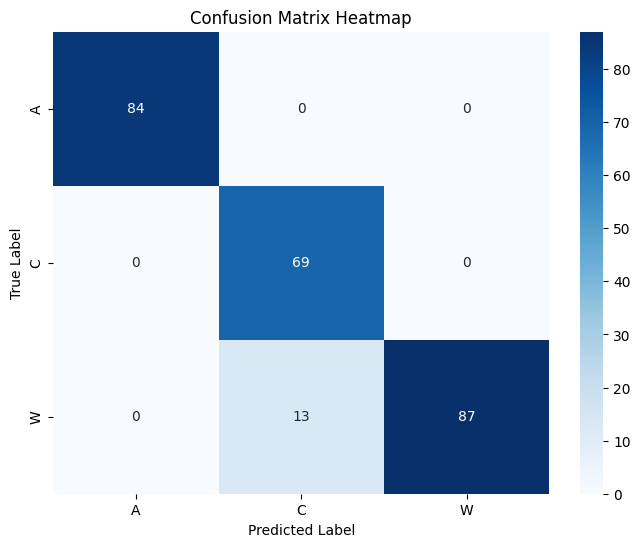

In [6]:
# Assuming 'model' is your trained CNN model and 'test_generator' is your test data generator
class_labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix heatmap
confusion_matrix = plot_confusion_matrix_heatmap(test_generator, model_2, class_labels)

In [7]:
# # Lưu trữ mô hình huấn luyện
model_2.save('D:/HK1 2024 2025/Deep Learning/BTL/Final/models/CNN_1.keras')  # Lưu mô hình vào file .h5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


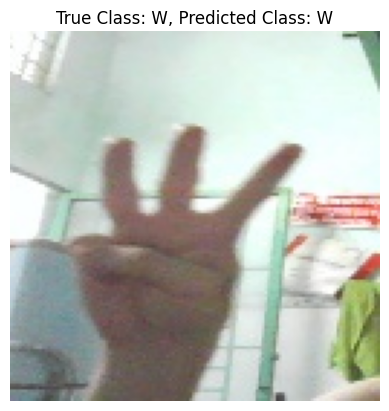

In [8]:
from tensorflow.keras.preprocessing import image
import random
import numpy as np
import matplotlib.pyplot as plt

# Danh sách nhãn tương ứng với các lớp
label_map = ['A', 'C', 'W']

# Chọn ngẫu nhiên 1 chỉ số ảnh từ tập kiểm tra
random_index = random.choice(range(len(test_generator)))

# Lấy ảnh và nhãn thật từ test_generator
test_images, test_labels = test_generator[random_index]

# Dự đoán cho ảnh ngẫu nhiên
predictions = model_2.predict(test_images)
predicted_class_index = np.argmax(predictions[0])  # Chọn lớp có xác suất cao nhất
true_class_index = np.argmax(test_labels[0])  # Nhãn thật

# Chuyển nhãn số thành nhãn chữ
predicted_class = label_map[predicted_class_index]
true_class = label_map[true_class_index]

# Hiển thị kết quả
plt.imshow(test_images[0])  # Hiển thị ảnh
plt.title(f'True Class: {true_class}, Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()
